<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1:" data-toc-modified-id="Q1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q1:</a></span><ul class="toc-item"><li><span><a href="#summary-statistics-of-the-key-variables-in-Renrendai-loans.xlsx" data-toc-modified-id="summary-statistics-of-the-key-variables-in-Renrendai-loans.xlsx-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>summary statistics of the key variables in Renrendai loans.xlsx</a></span></li><li><span><a href="#summary-statistics-of-the-key-variables-in-p2p-lending-platforms.xlsx" data-toc-modified-id="summary-statistics-of-the-key-variables-in-p2p-lending-platforms.xlsx-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>summary statistics of the key variables in p2p lending platforms.xlsx</a></span></li></ul></li><li><span><a href="#Q2:" data-toc-modified-id="Q2:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q2:</a></span><ul class="toc-item"><li><span><a href="#Dealing-missing-values" data-toc-modified-id="Dealing-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dealing missing values</a></span></li><li><span><a href="#Perform-logit-regression" data-toc-modified-id="Perform-logit-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Perform logit regression</a></span></li><li><span><a href="#Rebuild-Model-by-removing-non-significant-variables" data-toc-modified-id="Rebuild-Model-by-removing-non-significant-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Rebuild Model by removing non-significant variables</a></span></li></ul></li><li><span><a href="#Q3:" data-toc-modified-id="Q3:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q3:</a></span><ul class="toc-item"><li><span><a href="#Dealing-missing-values" data-toc-modified-id="Dealing-missing-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dealing missing values</a></span></li><li><span><a href="#Perform-OLS-regression" data-toc-modified-id="Perform-OLS-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Perform OLS regression</a></span></li></ul></li><li><span><a href="#Q4:" data-toc-modified-id="Q4:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q4:</a></span><ul class="toc-item"><li><span><a href="#Cox’s-proportional-hazard-model" data-toc-modified-id="Cox’s-proportional-hazard-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cox’s proportional hazard model</a></span></li><li><span><a href="#Calculate-Duration" data-toc-modified-id="Calculate-Duration-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculate Duration</a></span></li><li><span><a href="#Dealing-missing-values" data-toc-modified-id="Dealing-missing-values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Dealing missing values</a></span></li><li><span><a href="#Perform-the-Cox-model-(Proportional-hazards-model)" data-toc-modified-id="Perform-the-Cox-model-(Proportional-hazards-model)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Perform the Cox model (Proportional hazards model)</a></span></li></ul></li></ul></div>

# <center>MDS6212 Fintech Theory and Practice: Week 2 Assignment<center>

----
    
**220041006 *Yihang Li***

**Data confidential requirements:** 
*     Do not share datasets with others
*     Do not post datasets on the Web site
*     Datasets can only be used to work on assignments of MDS6212, M.Sc. in Data Science, CUHK-Shenzhen.

**Datasets:** 
*     MDS6212 Week 2 Renrendai loans.xlsx
*     MDS6212 Week 2 p2p lending platforms.xlsx

## Q1:
    1) Present two tables for the summary statistics of the key variables in Renrendai loans.xlsx and p2p lending platforms.xlsx

In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

 COX.png				     'Week2 Assignment.html'
'MDS6212 Week 2 Assignment.docx'	     'Week2 Assignment.ipynb'
'MDS6212 Week 2 Renrendai loans.xlsx'	     'Week2 Assignment.zip'
'MDS6212 Week 2 p2p lending platforms.xlsx'


In [3]:
#load two datasets
Renrendai = pd.read_excel('MDS6212 Week 2 Renrendai loans.xlsx')
P2P = pd.read_excel('MDS6212 Week 2 p2p lending platforms.xlsx')

In [4]:
Renrendai.head(1)

,loanId,STATUS,BIDS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,HOUSE,CAR,...,IND,CITY,PURPOSE,MARRY,AGE,opentime,readytime,title,description,nickName
0,2,CLOSED,9,0,3000,5.0,6,7,1,1,...,IT,北京,其他借款,未婚,33,2010-10-12 17:17:01,2010-10-15 11:00:49,庆祝上线,"看着人人贷经过精心的筹备,和长时间的内测,终于正式和大家见面了.特地来发个标, 希望大家多多...",一夫


In [5]:
P2P.head(1)

,fullname,OnlineTime_YMD,Bankrupt_WDZJ,Province,City,Collapse,Benign,Fraud,RegCapital,Background,Capitaldeposit,Obtaininvest,Joinasso,Autobid,Transright,Riskdeposit,Thirdguarantee
0,123便利贷,20140519,20170413.0,上海,上海,1,0.0,0.0,500.0,民营系,0,0.0,1.0,0,0,0.0,0.0


### summary statistics of the key variables in Renrendai loans.xlsx

In [6]:
Renrendai.describe().apply(
    lambda s: s.apply(lambda x: format(x, 'f')))

,loanId,BIDS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,HOUSE,CAR,HOUSE_L,CAR_L,EDUCATION,WORKTIME,INCOME,AGE
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9996.000000,9994.000000,9998.000000,10000.000000
mean,418846.947200,24.150600,0.151300,24545.835000,12.621900,12.237300,2.146300,0.564500,0.391700,0.228400,0.082200,2.165966,2.838003,4.309162,34.755500
std,446432.580191,41.342608,0.358359,38280.756524,2.273689,8.091090,1.530990,0.495847,0.488155,0.419823,0.274683,0.818108,0.992755,1.335842,6.682708
min,2.000000,1.000000,0.000000,3000.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,24.000000
25%,84635.250000,9.000000,0.000000,8000.000000,11.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,30.000000
50%,321945.000000,15.000000,0.000000,14400.000000,12.000000,12.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,33.000000
75%,582930.500000,24.000000,0.000000,26000.000000,13.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,4.000000,5.000000,38.000000
max,2086049.000000,592.000000,1.000000,500000.000000,24.400000,36.000000,7.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,7.000000,53.000000


### summary statistics of the key variables in p2p lending platforms.xlsx

In [7]:
P2P.describe().apply(
    lambda s: s.apply(lambda x: format(x, 'f')))

,OnlineTime_YMD,Bankrupt_WDZJ,Collapse,Benign,Fraud,RegCapital,Capitaldeposit,Obtaininvest,Joinasso,Autobid,Transright,Riskdeposit,Thirdguarantee
count,1000.000000,782.000000,1000.000000,782.000000,782.000000,1000.000000,1000.000000,968.000000,968.000000,1000.000000,1000.000000,968.000000,968.000000
mean,20148498.958000,20163303.048593,0.782000,0.098465,0.246803,596.064330,0.191000,0.026860,0.054752,0.244000,0.177000,0.021694,0.034091
std,11351.943281,13043.220563,0.413094,0.298134,0.431427,2328.221711,0.393286,0.161756,0.227613,0.429708,0.381860,0.145758,0.181557
min,20090409.000000,20120601.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20140917.750000,20151117.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20150401.000000,20160801.500000,1.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20151116.250000,20171107.000000,1.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20180524.000000,20190904.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Q2:
    2) Perform a logit regression and examine the relation between the default likelihood and borrower characteristics such as credit, house, car, education, work time, etc. 

### Dealing missing values

In [8]:
Renrendai.describe().columns

Index(['loanId', 'BIDS', 'DEFAULT', 'AMOUNT', 'INTEREST', 'MONTHS', 'CREDIT',
       'HOUSE', 'CAR', 'HOUSE_L', 'CAR_L', 'EDUCATION', 'WORKTIME', 'INCOME',
       'AGE'],
      dtype='object')

In [9]:
q2_Data = Renrendai[[
    'DEFAULT', 'CREDIT', 'HOUSE', 'CAR', 'EDUCATION', 'WORKTIME', 'HOUSE_L',
    'CAR_L', 'INCOME', 'AGE'
]]
q2_Data.describe()

,DEFAULT,CREDIT,HOUSE,CAR,EDUCATION,WORKTIME,HOUSE_L,CAR_L,INCOME,AGE
count,10000.000000,10000.00000,10000.000000,10000.000000,9996.000000,9994.000000,10000.000000,10000.000000,9998.000000,10000.000000
mean,0.151300,2.14630,0.564500,0.391700,2.165966,2.838003,0.228400,0.082200,4.309162,34.755500
std,0.358359,1.53099,0.495847,0.488155,0.818108,0.992755,0.419823,0.274683,1.335842,6.682708
min,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000
25%,0.000000,1.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,30.000000
50%,0.000000,2.00000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,33.000000
75%,0.000000,3.00000,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,5.000000,38.000000
max,1.000000,7.00000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,7.000000,53.000000


***EDUCATION, WORKTIME and INCOME have slightly degree of missing, here we just delete these missing values***

In [10]:
q2_Data = q2_Data[q2_Data['EDUCATION'].notnull()]
q2_Data.reset_index(drop = True, inplace = True)
q2_Data = q2_Data[q2_Data['WORKTIME'].notnull()]
q2_Data.reset_index(drop = True, inplace = True)
q2_Data = q2_Data[q2_Data['INCOME'].notnull()]
q2_Data.reset_index(drop = True, inplace = True)
q2_Data.describe()

,DEFAULT,CREDIT,HOUSE,CAR,EDUCATION,WORKTIME,HOUSE_L,CAR_L,INCOME,AGE
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.151451,2.146146,0.564765,0.391892,2.166066,2.838138,0.228529,0.082282,4.308909,34.754354
std,0.358506,1.531092,0.495813,0.488197,0.818221,0.992679,0.419906,0.274808,1.335527,6.680150
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,30.000000
50%,0.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,33.000000
75%,0.000000,3.000000,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,5.000000,38.000000
max,1.000000,7.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,7.000000,53.000000


***Now we have 9990 observations in total***

In [11]:
# default likelihood
q2_y = q2_Data[['DEFAULT']]
# borrower characteristics
q2_X = q2_Data[[
    'CREDIT', 'HOUSE', 'CAR', 'EDUCATION', 'WORKTIME', 'HOUSE_L', 'CAR_L',
    'INCOME', 'AGE'
]]

### Perform logit regression

***Now let's perform logit regression by using statsmodels***

In [12]:
import statsmodels.api as sm
# Try to standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
q2_X = scaler.fit(q2_X).transform(q2_X)
q2_X = sm.add_constant(q2_X)
q2_model = sm.Logit(q2_y, q2_X)
q2_result = q2_model.fit()

Optimization terminated successfully.
         Current function value: 0.330132
         Iterations 9


In [14]:
q2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                 9990
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.2236
Time:                        20:33:04   Log-Likelihood:                -3298.0
converged:                       True   LL-Null:                       -4247.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1979      0.091    -35.272      0.000      -3.376      -3.020
x1            -2.8978      0.126    -23.044      0.000      -3.144      -2.651
x2             0.0713      0.036      1.968      0.049       0.000       0.142
x3            -0.2239      0.039     -5.708      0.000      -0.301      -0.147
x4            -0.3401      0.033    -10.426      0.000      -0.404      -0.276
x5             0.0090      0.034      0.264      0.792      -0.058       0.076
x6            -0.1389      0.038     -3.633      0.000      -0.214      -0.064
x7             0.0445      0.037      1.207      0.228      -0.028       0.117
x8             0.1549      0.034      4.592      0.000       0.089       0.221
x9             0.1700      0.034      4.936      0.000       0.102       0.237
==============================================================================
"""

### Rebuild Model by removing non-significant variables

***We can see from the result summary, x5('WORKTIME') has much high p-value(0.792), which means it is not significant, so as x7('CAR_L'). Thus we may rebuild our model by removing them***

In [15]:
# borrower characteristics by removing 'WORKTIME' and 'CAR_L'
q2_X = q2_Data[[
    'CREDIT', 'HOUSE', 'CAR', 'EDUCATION', 'HOUSE_L',
    'INCOME', 'AGE'
]]

In [16]:
q2_X = scaler.fit(q2_X).transform(q2_X)
q2_X = sm.add_constant(q2_X)

In [17]:
q2_model = sm.Logit(q2_y, q2_X)
q2_result = q2_model.fit()

Optimization terminated successfully.
         Current function value: 0.330206
         Iterations 9


In [18]:
q2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                 9990
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                            7
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.2234
Time:                        20:33:04   Log-Likelihood:                -3298.8
converged:                       True   LL-Null:                       -4247.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1951      0.091    -35.288      0.000      -3.373      -3.018
x1            -2.8951      0.126    -23.050      0.000      -3.141      -2.649
x2             0.0725      0.036      2.014      0.044       0.002       0.143
x3            -0.2053      0.036     -5.707      0.000      -0.276      -0.135
x4            -0.3400      0.033    -10.451      0.000      -0.404      -0.276
x5            -0.1364      0.038     -3.574      0.000      -0.211      -0.062
x6             0.1546      0.034      4.598      0.000       0.089       0.220
x7             0.1710      0.032      5.328      0.000       0.108       0.234
==============================================================================
"""

***Now all the variables against 'DEFAULT' are significant***

## Q3:
    3) Perform an ols regression and examine the relation between the number of bids and borrower characteristics such as credit, house, car, education, work time, etc.

### Dealing missing values

In [19]:
q3_Data = Renrendai[[
    'BIDS', 'CREDIT', 'HOUSE', 'CAR', 'EDUCATION', 'WORKTIME', 'HOUSE_L',
    'CAR_L', 'INCOME', 'AGE'
]]
q3_Data.describe()

,BIDS,CREDIT,HOUSE,CAR,EDUCATION,WORKTIME,HOUSE_L,CAR_L,INCOME,AGE
count,10000.000000,10000.00000,10000.000000,10000.000000,9996.000000,9994.000000,10000.000000,10000.000000,9998.000000,10000.000000
mean,24.150600,2.14630,0.564500,0.391700,2.165966,2.838003,0.228400,0.082200,4.309162,34.755500
std,41.342608,1.53099,0.495847,0.488155,0.818108,0.992755,0.419823,0.274683,1.335842,6.682708
min,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000
25%,9.000000,1.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,30.000000
50%,15.000000,2.00000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,33.000000
75%,24.000000,3.00000,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,5.000000,38.000000
max,592.000000,7.00000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,7.000000,53.000000


In [20]:
q3_Data = q3_Data[q3_Data['EDUCATION'].notnull()]
q3_Data.reset_index(drop = True, inplace = True)
q3_Data = q3_Data[q3_Data['WORKTIME'].notnull()]
q3_Data.reset_index(drop = True, inplace = True)
q3_Data = q3_Data[q3_Data['INCOME'].notnull()]
q3_Data.reset_index(drop = True, inplace = True)
q3_Data.describe()

,BIDS,CREDIT,HOUSE,CAR,EDUCATION,WORKTIME,HOUSE_L,CAR_L,INCOME,AGE
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,24.116316,2.146146,0.564765,0.391892,2.166066,2.838138,0.228529,0.082282,4.308909,34.754354
std,41.242397,1.531092,0.495813,0.488197,0.818221,0.992679,0.419906,0.274808,1.335527,6.680150
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000
25%,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,30.000000
50%,15.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,33.000000
75%,24.000000,3.000000,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,5.000000,38.000000
max,592.000000,7.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,7.000000,53.000000


In [21]:
# number of bids
q3_y = q3_Data[['BIDS']]
# borrower characteristics
q3_X = q3_Data[[
    'CREDIT', 'HOUSE', 'CAR', 'EDUCATION', 'WORKTIME', 'HOUSE_L', 'CAR_L',
    'INCOME', 'AGE'
]]

### Perform OLS regression

In [22]:
q3_X = scaler.fit(q3_X).transform(q3_X)
q3_X = sm.add_constant(q3_X)

q3_model = sm.OLS(q3_y, q3_X)

q3_result = q3_model.fit()

In [23]:
q3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     232.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:33:05   Log-Likelihood:                -50383.
No. Observations:                9990   AIC:                         1.008e+05
Df Residuals:                    9980   BIC:                         1.009e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1163      0.375     64.242      0.000      23.380      24.852
x1             2.8557      0.394      7.248      0.000       2.083       3.628
x2             0.7982      0.459      1.738      0.082      -0.102       1.698
x3             2.0788      0.448      4.637      0.000       1.200       2.958
x4            -1.6398      0.389     -4.218      0.000      -2.402      -0.878
x5             2.4175      0.423      5.721      0.000       1.589       3.246
x6            -2.9933      0.432     -6.924      0.000      -3.841      -2.146
x7            -1.9772      0.407     -4.854      0.000      -2.776      -1.179
x8            12.3210      0.412     29.918      0.000      11.514      13.128
x9             5.4282      0.444     12.235      0.000       4.558       6.298
==============================================================================
Omnibus:                    11602.380   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1282780.294
Skew:                           6.139   Prob(JB):                         0.00
Kurtosis:                      57.139   Cond. No.                         2.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q4:
    4) Perform the Cox model (Proportional hazards model) and examine the relation between the platform default (survival) likelihood and platform characteristics such as RegCapital, Joinasso, etc.

### Cox’s proportional hazard model

> Reference: https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

**The idea behind Cox’s proportional hazard model is that the log-hazard of an individual is a linear function of their covariates and a population-level baseline hazard that changes over time. Mathematically:**

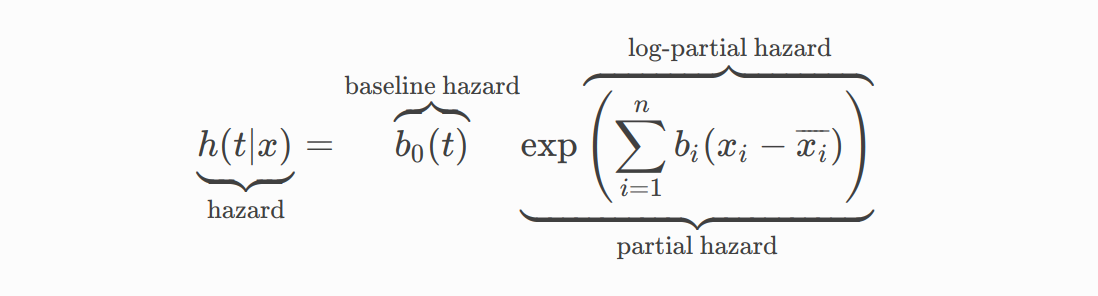

**Note a few behaviors about this model: the only time component is in the baseline hazard, $b_0(t)$. In the above equation, the partial hazard is a time-invariant scalar factor that only increases or decreases the baseline hazard. Thus changes in covariates will only inflate or deflate the baseline hazard.**

### Calculate Duration

**We need to calculate 'Duration' by subtracting 'OnlineTime_YMD' from 'Bankrupt_WDZJ'**

In [24]:
P2P.describe().apply(
    lambda s: s.apply(lambda x: format(x, 'f')))

,OnlineTime_YMD,Bankrupt_WDZJ,Collapse,Benign,Fraud,RegCapital,Capitaldeposit,Obtaininvest,Joinasso,Autobid,Transright,Riskdeposit,Thirdguarantee
count,1000.000000,782.000000,1000.000000,782.000000,782.000000,1000.000000,1000.000000,968.000000,968.000000,1000.000000,1000.000000,968.000000,968.000000
mean,20148498.958000,20163303.048593,0.782000,0.098465,0.246803,596.064330,0.191000,0.026860,0.054752,0.244000,0.177000,0.021694,0.034091
std,11351.943281,13043.220563,0.413094,0.298134,0.431427,2328.221711,0.393286,0.161756,0.227613,0.429708,0.381860,0.145758,0.181557
min,20090409.000000,20120601.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20140917.750000,20151117.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20150401.000000,20160801.500000,1.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20151116.250000,20171107.000000,1.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20180524.000000,20190904.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**As above, not every platform bankrupt in this dataset. And in order to calculate the duration, we may need to consider using today's date to filling all the missing values in the 'Bankrupt_WDZJ'**

In [25]:
from datetime import datetime

In [26]:
P2P['Bankrupt_WDZJ'] = P2P['Bankrupt_WDZJ'].fillna(eval(datetime.today().strftime('%Y%m%d')))

# Calculate duration
P2P['Duration'] = P2P['Bankrupt_WDZJ'] - P2P['OnlineTime_YMD']

In [27]:
P2P.describe().columns

Index(['OnlineTime_YMD', 'Bankrupt_WDZJ', 'Collapse', 'Benign', 'Fraud',
       'RegCapital', 'Capitaldeposit', 'Obtaininvest', 'Joinasso', 'Autobid',
       'Transright', 'Riskdeposit', 'Thirdguarantee', 'Duration'],
      dtype='object')

In [28]:
# Collect the columns we need
q4_Data = P2P[[
    'Duration', 'Collapse', 'RegCapital', 'Joinasso', 'Capitaldeposit',
    'Obtaininvest', 'Autobid', 'Transright', 'Riskdeposit', 'Thirdguarantee'
]]

### Dealing missing values

In [29]:
q4_Data.describe()

,Duration,Collapse,RegCapital,Joinasso,Capitaldeposit,Obtaininvest,Autobid,Transright,Riskdeposit,Thirdguarantee
count,1000.000000,1000.000000,1000.000000,968.000000,1000.000000,968.000000,1000.000000,1000.00000,968.000000,968.000000
mean,23049.058000,0.782000,596.064330,0.054752,0.191000,0.026860,0.244000,0.17700,0.021694,0.034091
std,19617.492331,0.413094,2328.221711,0.227613,0.393286,0.161756,0.429708,0.38186,0.145758,0.181557
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,9604.750000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,19517.500000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,39713.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,100111.000000,1.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [30]:
q4_Data = q4_Data[q4_Data['Joinasso'].notnull()]
q4_Data.reset_index(drop = True, inplace = True)
q4_Data = q4_Data[q4_Data['Obtaininvest'].notnull()]
q4_Data.reset_index(drop = True, inplace = True)
q4_Data = q4_Data[q4_Data['Riskdeposit'].notnull()]
q4_Data.reset_index(drop = True, inplace = True)
q4_Data = q4_Data[q4_Data['Thirdguarantee'].notnull()]
q4_Data.reset_index(drop = True, inplace = True)
q4_Data.describe()

,Duration,Collapse,RegCapital,Joinasso,Capitaldeposit,Obtaininvest,Autobid,Transright,Riskdeposit,Thirdguarantee
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,22231.339876,0.799587,593.436568,0.054752,0.164256,0.026860,0.252066,0.182851,0.021694,0.034091
std,19075.483387,0.400517,2365.067294,0.227613,0.370699,0.161756,0.434423,0.386744,0.145758,0.181557
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9584.250000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19404.500000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39395.250000,1.000000,500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100111.000000,1.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Perform the Cox model (Proportional hazards model)

In [31]:
from lifelines import CoxPHFitter

**Collapse vs all**

In [32]:
cph = CoxPHFitter()
cph.fit(q4_Data, duration_col='Duration', event_col='Collapse')
cph.print_summary()  

<lifelines.CoxPHFitter: fitted with 968 total observations, 194 right-censored observations>
             duration col = 'Duration'
                event col = 'Collapse'
      baseline estimation = breslow
   number of observations = 968
number of events observed = 774
   partial log-likelihood = -4702.35
         time fit was run = 2020-11-24 12:33:06 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
RegCapital       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Joinasso        -0.63       0.53       0.23            -1.08            -0.19                 0.34                 0.83
Capitaldeposit  -1.35       0.26       0.14            -1.62            -1.08                 0.20                 0.34
Obtaininvest    -0.14       0.87       0.27            -0.66             0.39                 0.52                 1.48
Autobid         -0.19       0.83       0.09            -0.36            -0.01                 0.70                 0.99
Transright      -0.55       0.58       0.11            -0.76            -0.34                 0.47                 0.71
Riskdeposit     -0.13       0.88       0.27            -0.65             0.40                 0.52                 1.48
Thirdguarantee  -0.20       0.82       0.23            -0.65             0.24                 0.52                 1.27

                   z      p   -log2(p)
covariate                             
RegCapital      0.11   0.91       0.13
Joinasso       -2.79   0.01       7.55
Capitaldeposit -9.94 <0.005      74.89
Obtaininvest   -0.51   0.61       0.71
Autobid        -2.07   0.04       4.70
Transright     -5.11 <0.005      21.54
Riskdeposit    -0.48   0.63       0.66
Thirdguarantee -0.90   0.37       1.44
---
Concordance = 0.66
Partial AIC = 9420.69
log-likelihood ratio test = 273.89 on 8 df
-log2(p) of ll-ratio test = 178.83

    we can see here, most of the covariates are not significant. And curiously, the coef of 'RegCapital' is 0, then what does this mean?

**Plot the coefficients**

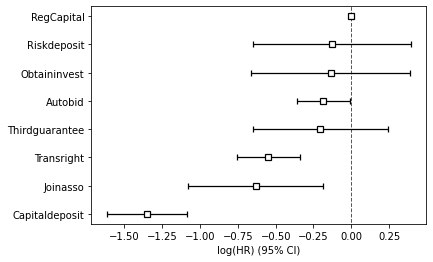

In [33]:
cph.plot()

In [41]:
import matplotlib.pyplot as plt

**Plot the effect of varying a covariate**
    After fitting, we can plot what the survival curves look like as we vary a single covariate while holding everything else equal. This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_partial_effects_on_outcome() method and give it the covariate of interest, and the values to display.

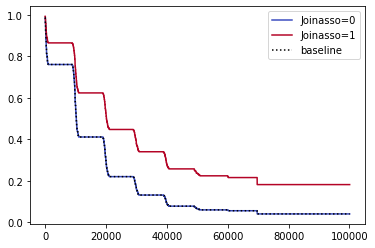

In [42]:
#Take 'Joinasso' for example
cph.plot_partial_effects_on_outcome(covariates='Joinasso', values=[0, 1], cmap='coolwarm')
plt.savefig('Joinasso.png', bbox_inches='tight')

    We can see here, join an association(Joinasso=1, the red line) can survive longer

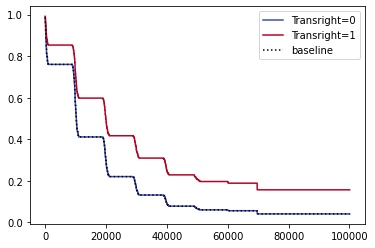

In [43]:
#Take 'Transright' for example
cph.plot_partial_effects_on_outcome(covariates='Transright', values=[0, 1], cmap='coolwarm')
plt.savefig('Transright.png', bbox_inches='tight')

In [36]:
q4_Data.loc[:, 'RegCapital'].value_counts()

500.000     231
100.000     228
1000.000     91
300.000      69
200.000      63
           ... 
343.000       1
660.000       1
107.500       1
950.000       1
500.158       1
Name: RegCapital, Length: 126, dtype: int64

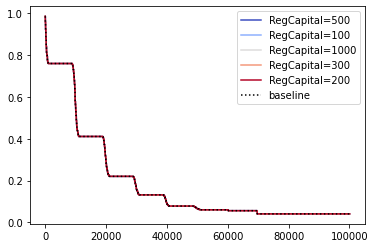

In [44]:
#Take 'RegCapital' for example
cph.plot_partial_effects_on_outcome(covariates='RegCapital', values=[500, 100, 1000, 300, 200], cmap='coolwarm')
plt.savefig('RegCapital.png', bbox_inches='tight')

*May be a possible explanation for the coef of RegCapital being 0 is that there's no survival difference among different values of RegCapital*

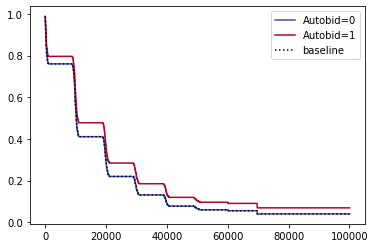

In [45]:
#Take 'Autobid' for example
cph.plot_partial_effects_on_outcome(covariates='Autobid', values=[0, 1], cmap='coolwarm')
plt.savefig('Autobid.png', bbox_inches='tight')

*Here we see, for the 'Autobid', there is a slightly difference*

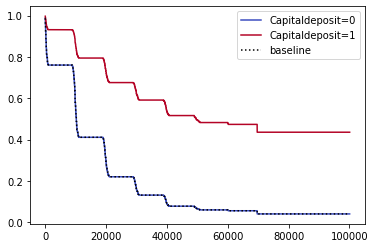

In [46]:
#Take 'Capitaldeposit' for example
cph.plot_partial_effects_on_outcome(covariates='Capitaldeposit', values=[0, 1], cmap='coolwarm')
plt.savefig('Capitaldeposit.png', bbox_inches='tight')

*Here we see, for the 'Capitaldeposit', there is a huge difference*

    'Obtaininvest','Riskdeposit', 'Thirdguarantee'

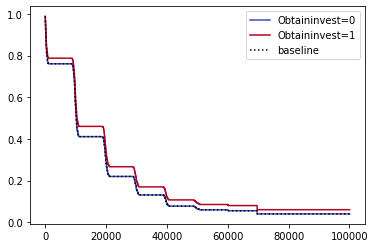

In [47]:
cph.plot_partial_effects_on_outcome(covariates='Obtaininvest', values=[0, 1], cmap='coolwarm')
plt.savefig('Obtaininvest.png', bbox_inches='tight')

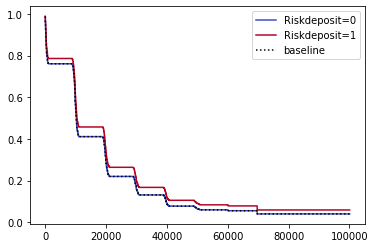

In [48]:
cph.plot_partial_effects_on_outcome(covariates='Riskdeposit', values=[0, 1], cmap='coolwarm')
plt.savefig('Riskdeposit.png', bbox_inches='tight')

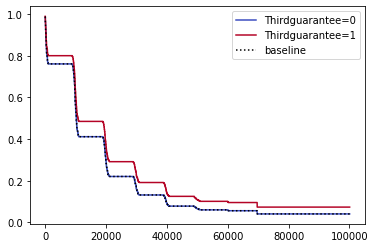

In [49]:
cph.plot_partial_effects_on_outcome(covariates='Thirdguarantee', values=[0, 1], cmap='coolwarm')
plt.savefig('Thirdguarantee.png', bbox_inches='tight')